In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

news = pd.read_json('../data/database.json')

In [17]:
import calendar
import datetime

# Erstellt eine neue Zeile mit dem Wochentag
news['day_of_week'] = news['date'].dt.day_of_week
news['day_of_week_word'] = news['date'].dt.day_name(locale='de_de') 

news['hour'] = news['date'].dt.hour

In [18]:
news = news.groupby(["hour", "day_of_week"]).size().reset_index(name="amount")

In [19]:
news.head()

,hour,day_of_week,amount
0,0,0,3
1,0,1,3
2,0,2,3
3,0,3,3
4,0,4,3


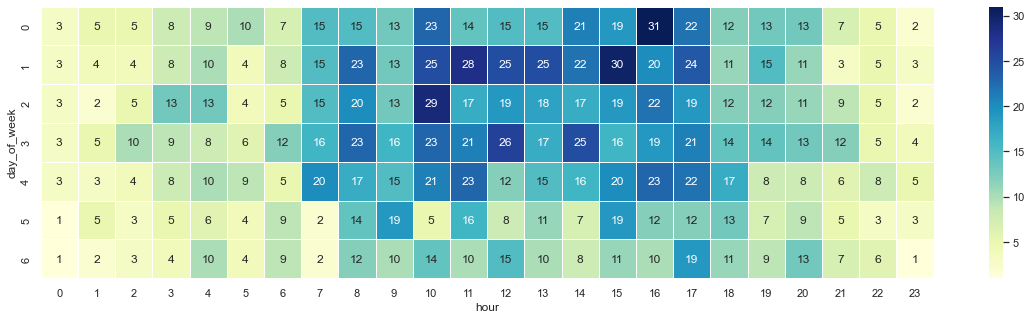

In [5]:
from importlib.resources import path
import seaborn as sns
import pandas as pd

sns.set(rc={'figure.figsize':(20,5)})

newsPivot = news.pivot("day_of_week", "hour", "amount")
ax = sns.heatmap(newsPivot, linewidths=.5, annot=True, fmt="d", cmap="YlGnBu")

newsPivot.to_json('news.json')